# User's Guide, Chapter 31: Clefs, Ties, and Beams

Throughout the first thirty chapters, we have repeatedly been using fundamental music notation principles, such as clefs, ties, and beams, but we have never talked about them directly.  This chapter gives a chance to do so and to look at some `Stream` methods that make use of them.

Let's first look at clefs.  They all live in the :ref:`moduleClef` module:

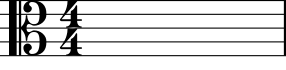

In [1]:
alto = clef.AltoClef()
m = stream.Measure([alto])
m.show()

Since clefs can be put into Streams, they are Music21Objects, with offsets, etc., but they generally have a Duration of zero.

In [2]:
alto.offset

0.0

In [3]:
alto.duration

<music21.duration.Duration 0.0>

Multiple clefs can coexist in the same measure, and will all display (so long as there's at least one note between them; a problem of our MusicXML readers):

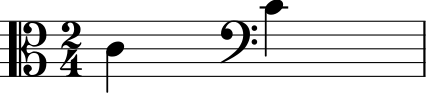

In [4]:
m.append(note.Note('C4'))
bass = clef.BassClef()
m.append(bass)
m.append(note.Note('C4'))
m.show()

Most of the clefs in common use are `PitchClefs` and they know what line they are on:

In [5]:
alto.line

3

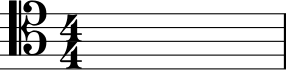

In [6]:
tenor = clef.TenorClef()
tenor.show()

In [7]:
tenor.line

4

In this case, the line refers to the pitch that it's "sign" can be found on.

In [8]:
tenor.sign

'C'

In [9]:
treble = clef.TrebleClef()
treble.sign

'G'

Clefs also have an `.octaveChange` value which specifies how many octaves "off" from the basic clef they are.

In [10]:
treble.octaveChange

0

In [11]:
t8vb = clef.Treble8vbClef()
t8vb.octaveChange

-1

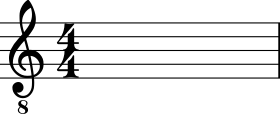

In [12]:
t8vb.show()

There are some clefs that do not support Pitches, such as NoClef:

In [13]:
noClef = clef.NoClef()

This clef is not supported in MuseScore, but in some other MusicXML readers, will render a score without a clef.  Percussion clefs also are not pitch clefs:

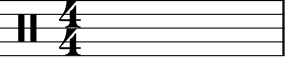

In [14]:
clef.PercussionClef().show()

There are a lot of clefs that are pre-defined in `music21` including unusual ones such as `MezzoSopranoClef`, `SubBassClef`, and `JianpuClef`.  The :ref:`moduleClef` module lists them all.  But you can also create your own clef.

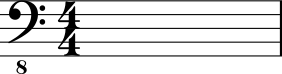

In [15]:
pc = clef.PitchClef()
pc.sign = 'F'
pc.line = 4
pc.octaveChange = -1
pc.show()

And you can get a clef from a string by using the :func:`~music21.clef.clefFromString` function:

In [16]:
clef.clefFromString('treble')

<music21.clef.TrebleClef>

Or from a sign and a number of the line:

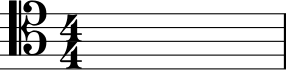

In [17]:
c = clef.clefFromString('C4')
c.show()

Note, be very careful not to name your variable `clef` or you will lose access to the `clef` module!

## Automatic Clef Generation

Look at this quick Stream:

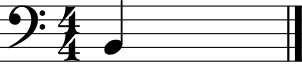

In [18]:
n = note.Note('B2')
s = stream.Stream([n])
s.show()

How did `music21` know to make the clef be bass clef?  It turns out that there's a function in `clef` called :func:`~music21.clef.bestClef` which can return the best clef given the contents of the stream:

In [19]:
clef.bestClef(s)

<music21.clef.BassClef>

In [20]:
s.append(note.Note('C6'))
clef.bestClef(s)

<music21.clef.TrebleClef>

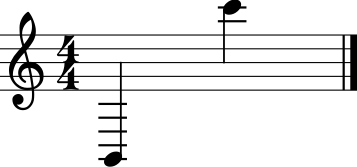

In [21]:
s.show()

`bestClef` has two configurable options, `allowTreble8vb` if set to True, gives the very useful `Treble8vb` clef:

In [22]:
n = note.Note('B3')
s = stream.Stream([n])
clef.bestClef(s, allowTreble8vb=True)

<music21.clef.Treble8vbClef>

And it also has a `recurse` parameter, which should be set to True when running on a nested stream structure, such as a part:

In [23]:
bass = corpus.parse('bwv66.6').parts['bass']
clef.bestClef(bass)

<music21.clef.TrebleClef>

In [24]:
clef.bestClef(bass, recurse=True)

<music21.clef.BassClef>

## Ties

That's enough about clefs, let's move to a similarly basic musical element called "Ties".  Ties connect two pitches at the same pitch level attached to different notes or chords.  All notes have a `.tie` attribute that specifies where the tie lives.  Let's look at the top voice of an Agnus Dei by Palestrina:

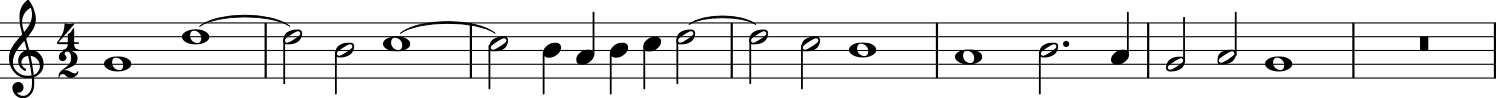

In [25]:
agnus = corpus.parse('palestrina/Agnus_1')
agnusSop = agnus.parts[0]
agnusSop.measures(1, 7).show()

The second note of the first measure is tied, so let's find it:

In [26]:
n1 = agnusSop.recurse().notes[1]
n1

<music21.note.Note D>

Now let's look at the `.tie` attribute:

In [27]:
n1.tie

<music21.tie.Tie start>

I'll bet that if we get the next note, we'll find it has a Tie marked stop:

In [28]:
n1.next('Note').tie

<music21.tie.Tie stop>

The previous `Note` though, has a `.tie` of None

In [29]:
print(n1.previous('Note').tie)

None


We can find the value of 'start' or 'stop' in the `.type` attribute of the :class:`~music21.tie.Tie`.

In [30]:
n1.tie.type

'start'

In [31]:
n1.next('Note').tie.type

'stop'

There is a third tie type, 'continue' if a the note is tied from before and tied to the next note, we'll demonstrate it by creating some notes and ties manually:

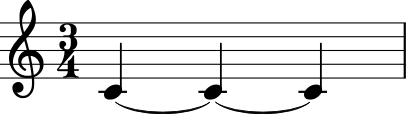

In [32]:
c0 = note.Note('C4')
c0.tie = tie.Tie('start')
c1 = note.Note('C4')
c1.tie = tie.Tie('continue')
c2 = note.Note('C4')
c2.tie = tie.Tie('stop')
s = stream.Measure()
s.append([c0, c1, c2])
s.show()

Ties also have a `.placement` attribute which can be 'above', 'below', or None, the last meaning to allow renderers to determine the position from context:

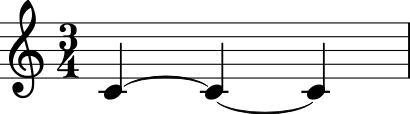

In [33]:
c0.tie.placement = 'above'
s.show()

Setting the placement on a 'stop' tie does nothing.

### Ties and chords

Chords also have a `.tie` attribute:

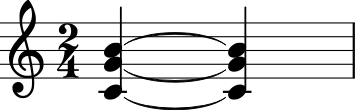

In [34]:
ch0 = chord.Chord('C4 G4 B4')
ch0.tie = tie.Tie('start')
ch1 = chord.Chord('C4 G4 B4')
ch1.tie = tie.Tie('stop')
s = stream.Measure()
s.append([ch0, ch1])
s.show()

This is great and simple if you have two chords that are identical, but what if there are two chords where some notes should be tied and some should not be, such as:

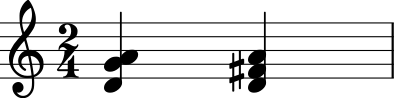

In [35]:
ch2 = chord.Chord('D4 G4 A4')
ch3 = chord.Chord('D4 F#4 A4')
s = stream.Measure()
s.append([ch2, ch3])
s.show()

The D and the A might want to be tied, but the suspended G needs to resolve to the F# without having a tie in it.  